In [132]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [133]:
# Read in data for y_train and calculate the prior

y_train = np.genfromtxt('y_train.csv')
yPi = np.mean(y_train)
yN1 = 0
indicesY1 = []
indicesY0 = []

for i in range(0, len(y_train)):
    if y_train[i] == 1:
        yN1 += 1
        indicesY1.append(i)
    else:
        indicesY0.append(i)
        
yN0 = len(y_train) - yN1


In [134]:
# Separating the Bernoulli and pareto data
x_train = np.genfromtxt('x_train.csv', delimiter=',')
bernX = x_train[:, 0:54]
parX = x_train[:, 54:57]
bernX_1 = bernX[indicesY1]
bernX_0 = bernX[indicesY0]
parX_1 = parX[indicesY1]
parX_0 = parX[indicesY0]

print(np.shape(bernX_0))


(2732, 54)


In [135]:
# Calculating the bernoulli paramters
bernTheta1 = np.zeros(54)
bernTheta0 = np.zeros(54)

for c in range(0, len(bernX_1.T)):
    bernTheta1[c] = np.mean(bernX_1.T[c])

for c in range(0, len(bernX_0.T)):
    bernTheta0[c] = np.mean(bernX_0.T[c])

print(bernTheta1)
print(bernTheta0)



[3.53603604e-01 3.41779279e-01 6.13175676e-01 2.13963964e-02
 6.23310811e-01 3.76126126e-01 4.19481982e-01 3.44031532e-01
 3.07995495e-01 4.58333333e-01 3.13626126e-01 6.29504505e-01
 2.87162162e-01 1.27815315e-01 1.60472973e-01 5.45045045e-01
 3.83445946e-01 3.81193694e-01 8.86261261e-01 2.10022523e-01
 8.06306306e-01 5.29279279e-02 3.34459459e-01 3.76689189e-01
 2.75900901e-02 1.46396396e-02 3.94144144e-03 1.68918919e-02
 6.75675676e-03 9.57207207e-03 1.68918919e-03 1.12612613e-03
 3.43468468e-02 5.63063063e-03 2.53378378e-02 6.25000000e-02
 5.57432432e-02 1.80180180e-02 3.32207207e-02 1.12049550e-01
 5.63063063e-04 1.12612613e-02 4.78603604e-02 2.59009009e-02
 2.69707207e-01 3.82882883e-02 1.01351351e-02 9.00900901e-03
 1.51463964e-01 6.53153153e-01 7.20720721e-02 8.33333333e-01
 6.14864865e-01 2.86599099e-01]
[0.14860908 0.09919473 0.27708638 0.00292826 0.22254758 0.11530015
 0.01573939 0.07320644 0.07942899 0.16983895 0.05197657 0.42569546
 0.11749634 0.04538799 0.01793558 0.09114

In [136]:
print(bernTheta0[51])

0.26903367496339675


In [137]:
# Calculate the pareto parameters 
parTheta1 = np.zeros(3)
parTheta0 = np.zeros(3)

for c in range(0, len(parX_1.T)):
    parTheta1[c] = yN1/(np.sum(np.log(parX_1.T[c])))

for c in range(0, len(parX_0.T)):
    parTheta0[c] = yN0/(np.sum(np.log(parX_0.T[c])))
    
print(parTheta1)
print(parTheta0)

[0.73311718 0.27128743 0.18592499]
[1.51973529 0.46178096 0.25072408]


In [138]:
# Load data from testing set
y_test = np.genfromtxt('y_test.csv')
x_test = np.genfromtxt('X_test.csv', delimiter=',')



In [139]:
# Takes the data point, the thetas for the bernoulli and calculates the class conditional probability
def classConditional(data, bernTheta, parTheta):
    bernData = data[0:54]
    parData = data[54:57]
    bernProd = 1
    parProd = 1
    for i in range(0, len(bernData)):
        bernProd *= np.power(bernTheta[i], bernData[i]) * np.power((1-bernTheta[i]), (1-bernData[i]))
    for i in range(0, len(parData)):
        parProd *= parTheta[i]* np.power(parData[i], -(parTheta[i] + 1))
    
    return bernProd * parProd
        

In [140]:
def predictY(testData,bernTheta0, bernTheta1, parTheta0, parTheta1, yPi):
    predictions = []
    zero = 0
    one = 0
    for i in range (0, len(testData)):
        zero = (1- yPi) * classConditional(testData[i], bernTheta0, parTheta0)
        one = (yPi) * classConditional(testData[i], bernTheta1, parTheta1)
        if(one > zero):
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [141]:
predictions = predictY(x_test, bernTheta0, bernTheta1, parTheta0, parTheta1, yPi)
print(predictions)

[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [142]:
def confusion_matrix(predictions, actual):
    correctOnes = 0
    correctZeros = 0
    incorrectOnes = 0
    incorrectZeros = 0
    for i in range (0, len(predictions)):
        if(predictions[i] == actual[i]):
            if(predictions[i] == 1):
                correctOnes += 1
            else:
                correctZeros += 1
        else:
            if(predictions[i] == 1):
                incorrectOnes += 1
            else:
                incorrectZeros += 1
        
    return (correctZeros, incorrectOnes, incorrectZeros, correctOnes, (correctZeros + correctOnes)/93 * 100)  

In [143]:
print(confusion_matrix(predictions, y_test))


(54, 2, 5, 32, 92.47311827956989)


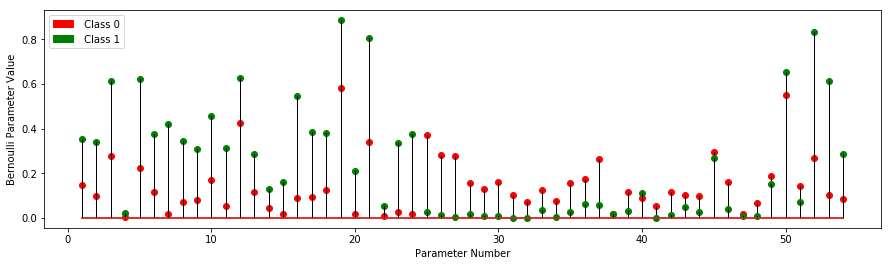

In [144]:
fig = plt.figure(figsize=(15, 4))


markerline, stemlines, baseline =plt.stem(np.arange(1,55), bernTheta0)
markerline2, stemlines2, baseline2 = plt.stem(np.arange(1,55), bernTheta1)

plt.setp(stemlines2, color = 'BLACK', linewidth=1, linestyle='-')
plt.setp(stemlines, color = 'BLACK', linewidth=1, linestyle='-')

plt.setp (markerline, color = 'r')

plt.setp (markerline2, color = 'g')
plt.xlabel("Parameter Number")
plt.ylabel("Bernoulli Parameter Value")

red_patch = mpatches.Patch(color='red', label=' Class 0')
green_patch = mpatches.Patch(color='green', label=' Class 1')
plt.legend(handles=[red_patch, green_patch])


plt.show()


In [145]:
# implementing KNN prediction algorithm and how ties are decided (randomly)

import random

def voteChoose(selections):
    numberOnes = selections.count(1)
    numberZeros = selections.count(0)
    
    if(numberOnes == numberZeros):
        return float(random.randint(0,1))
    elif(numberOnes > numberZeros):
        return 1.0
    else:
        return 0.0

        


def KNNpredict(k,x_train, y_train, x_testVal):
    distanceArray = []
    selections = []
    
    for i in range (0, len(x_train)):
        absdist = np.sum(np.absolute(x_testVal - x_train[i, :]))
        distanceArray.append((absdist, i))
    
    distanceArray.sort()
    
    for d in range(0,k):
        i = distanceArray[d][1]
        selections.append(y_train[i])
        
    return voteChoose(selections)

         
        
        
    

In [146]:
knnpredictions = np.zeros((20, len(x_test)) )

for k in range(1, 21):
    for i in range(0, len(x_test)):
        knnpredictions[k-1][i] = KNNpredict(k, x_train, y_train, x_test[i, :])
        
print(knnpredictions)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]


In [147]:
# Calculating the prediction accuracies using the confusion matrix format used before
knnpredacc = []
for i in range (0, 20):
    knnpredacc.append(confusion_matrix(knnpredictions[i], y_test)[4])

print(knnpredacc)


    

[89.24731182795699, 83.87096774193549, 86.02150537634408, 88.17204301075269, 88.17204301075269, 89.24731182795699, 86.02150537634408, 88.17204301075269, 90.32258064516128, 86.02150537634408, 84.94623655913979, 88.17204301075269, 88.17204301075269, 87.09677419354838, 86.02150537634408, 86.02150537634408, 84.94623655913979, 86.02150537634408, 86.02150537634408, 86.02150537634408]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


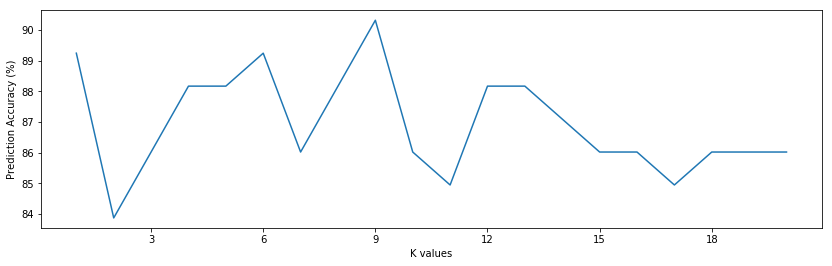

In [148]:
from matplotlib.ticker import MaxNLocator

newfig = plt.figure(figsize=(14, 4)).gca()

kxaxis = np.arange(1,21)
print(kxaxis)
plt.plot(kxaxis, knnpredacc)
plt.xlabel("K values")
plt.ylabel("Prediction Accuracy (%)")
newfig.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [149]:
# Change all 0's to -1's and extend with ones

y_train[y_train == 0] = -1
y_test[y_test == 0] = -1
x_train = np.hstack((x_train, np.ones((x_train.shape[0], 1))))
print(x_train)
print(y_test)


[[1.000e+00 1.000e+00 1.000e+00 ... 1.010e+02 1.028e+03 1.000e+00]
 [1.000e+00 0.000e+00 1.000e+00 ... 4.850e+02 2.259e+03 1.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 4.000e+01 1.910e+02 1.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 4.000e+00 1.400e+01 1.000e+00]
 [1.000e+00 0.000e+00 1.000e+00 ... 6.000e+00 1.180e+02 1.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 ... 5.000e+00 7.800e+01 1.000e+00]]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.]


In [150]:
import scipy as sp

def sigmoid1(yi, xi, w):
    denominator = 1.0 + np.exp(-(yi* np.dot(xi, w)))
    return 1/denominator
    

def sigmoid2(yi, xi, w):
    
    result = sp.special.expit(yi * np.dot(xi, w))
    return result

In [151]:
def gradient(x_train, y_train, w):
    result = 0.0
    for i in range(0, len(x_train)):
        result += (1 - sigmoid2(y_train[i], x_train[i], w)) *y_train[i] * x_train[i]
    return result

def gradVec(x_train, y_train, w):
    
    v1 = 1 - sp.special.expit(np.multiply(y_train, np.dot(x_train, w)))
    v2 = np.multiply(y_train, v1)
    v3 = x_train * v2[:, np.newaxis] 
    result = np.sum(v3, axis = 0)
    
    return result
    

In [152]:
winit = np.zeros(58)
wtest = gradVec(x_train, y_train, winit)


In [153]:
print(wtest)
print(gradient(x_train, y_train, winit))

[ 1.110000e+02  1.680000e+02  1.660000e+02  1.500000e+01  2.495000e+02
  1.765000e+02  3.510000e+02  2.055000e+02  1.650000e+02  1.750000e+02
  2.075000e+02 -2.250000e+01  9.450000e+01  5.150000e+01  1.180000e+02
  3.595000e+02  2.100000e+02  1.680000e+02 -7.500000e+00  1.635000e+02
  2.490000e+02  3.600000e+01  2.595000e+02  3.075000e+02 -4.860000e+02
 -3.720000e+02 -3.755000e+02 -1.980000e+02 -1.705000e+02 -2.120000e+02
 -1.400000e+02 -9.900000e+01 -1.385000e+02 -9.600000e+01 -1.930000e+02
 -1.835000e+02 -3.085000e+02 -9.000000e+00 -1.270000e+02 -2.250000e+01
 -7.150000e+01 -1.480000e+02 -9.950000e+01 -1.140000e+02 -1.670000e+02
 -1.870000e+02 -1.300000e+01 -8.450000e+01 -1.195000e+02 -1.730000e+02
 -1.310000e+02  3.725000e+02  4.030000e+02  1.415000e+02  5.221000e+03
  6.802200e+04  1.971905e+05 -4.780000e+02]
[ 1.110000e+02  1.680000e+02  1.660000e+02  1.500000e+01  2.495000e+02
  1.765000e+02  3.510000e+02  2.055000e+02  1.650000e+02  1.750000e+02
  2.075000e+02 -2.250000e+01  9.4

In [154]:
def etaCalc(t):
    return (1.0/((10**5) * np.sqrt(t + 1)))
    
def gradientDescent(x_train, y_train, t_iter):
    wArray = np.zeros((t_iter, len(x_train[1, :])))
    
    w = np.zeros(len(x_train[1, :]))

    for t in range(0, t_iter):
        
        w = w + etaCalc(t) * gradVec(x_train, y_train, w)
        wArray[t] = w
    return wArray
        

In [155]:
wArray = gradientDescent(x_train, y_train, 10000)

print(np.shape(wArray))
print(wArray[-1])


(10000, 58)
[-0.02100981  0.05544477 -0.0440878   0.01258965  0.12936796  0.10012095
  0.39588213  0.17669201  0.07872249  0.02347887  0.18010908 -0.37643501
  0.00426607  0.01530664  0.11036896  0.33332658  0.1410094   0.07854995
 -0.39366511  0.15304542  0.00434718  0.0346125   0.27504762  0.34578268
 -0.86217298 -0.63307911 -0.57772213 -0.33185718 -0.26339961 -0.34473932
 -0.2226102  -0.14575375 -0.27728183 -0.14436327 -0.34042256 -0.32637773
 -0.60632646 -0.02464776 -0.23743116 -0.08004356 -0.12706282 -0.25728123
 -0.19788523 -0.21185376 -0.37756659 -0.38546405 -0.02920632 -0.16707962
 -0.29016982 -0.5999388  -0.28131203  0.23104144  0.36154461  0.03356877
 -0.10437003  0.07013563 -0.01614281 -1.18579337]


In [156]:
winit = wArray[-1]
wtest = gradVec(x_train, y_train, winit)
wtest2 = gradient(x_train, y_train, winit)
print(wtest)
print(wtest2)

[ 4.46935526e+02  4.03358190e+02  7.77183857e+02  2.77829290e+01
  7.99517078e+02  4.84269649e+02  5.09062192e+02  4.56048860e+02
  3.95275605e+02  5.66049497e+02  4.00937803e+02  7.72358802e+02
  3.76057191e+02  1.73054507e+02  1.96698976e+02  6.70040534e+02
  4.77527297e+02  4.71737384e+02  1.06053928e+03  2.51361677e+02
  9.80932834e+02  8.27365461e+01  4.30029261e+02  4.98165595e+02
  2.03949648e+01  1.36407527e+01 -3.37382680e+01  2.04279561e+01
  6.68690292e+00  9.62880167e+00 -6.38349878e+00  1.35782858e+00
  4.00071424e+01  5.79607102e+00  2.16915171e+01  8.80099147e+01
  6.58867531e+01  2.63967479e+01  4.22665906e+01  1.42935838e+02
 -3.68279835e+00  5.42368959e+00  4.44096949e+01  2.26947323e+01
  3.17008818e+02  5.63835667e+00  1.71358559e+01  9.13357635e+00
  2.21667663e+02  8.39102199e+02  1.03959641e+02  1.02170679e+03
  7.92139716e+02  3.53719883e+02  5.47435902e+03  6.00767263e+04
  5.93703690e+05  1.09917993e+03]
[ 4.46935526e+02  4.03358190e+02  7.77183857e+02  2.7782

In [52]:
from decimal import Decimal

In [76]:
def objectiveFast(x_train, y_train, w):
    
    v1 = np.dot(x_train, w) * y_train[:, np.newaxis]
    v2 = np.sum(np.log(sp.special.expit(v1)))
    
    
    return v2
    



def objective(x_train, y_train, w):
    #result = 0.0
    
    for i in range (0, len(x_train)):
        v = y_train[i]* np.dot(x_train[i], w)
        if (v > 709):
         #   v = 709
        result += (v - np.log(1 + np.exp(v))))
    
    #v = sp.special.expit(np.multiply(y_train, np.dot(x_train, w)))
    #result = np.sum(np.log(v + 1e-10) )
    
    return result

        

In [77]:
objectiveVals = np.zeros(10000)

for i in range(0, 10000):
    objectiveVals[i] = objective(x_train, y_train, wArray[i])
    


[-198844.22466264 -179742.20393304 -247624.02911884 ...   -2381.82856804
   -7967.40180008  -15625.14630896]


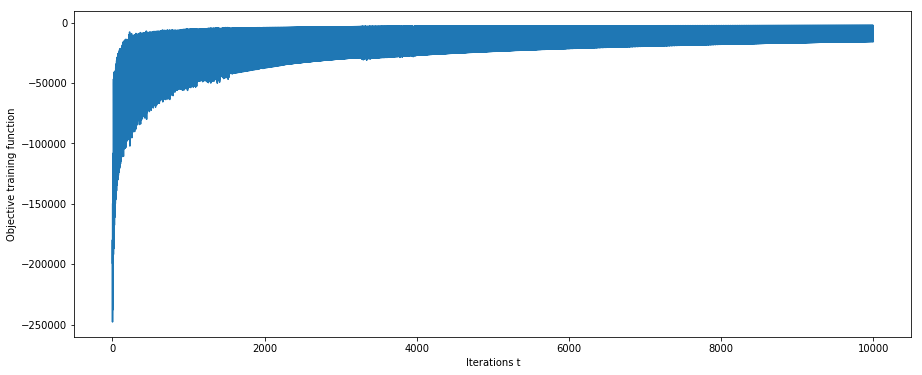

In [78]:
print(objectiveVals)
tArray = np.arange(0, 10000)
fig = plt.figure(figsize=(15,6))

plt.plot(tArray, objectiveVals)
plt.xlabel("Iterations t")
plt.ylabel("Objective training function")

plt.show()





In [ ]:
#calculating eta for newton method 


    

In [ ]:
def hessian(x_train, y_train, w):
    
    v1 = sp.special.expit(np.multiply(y_train, np.dot(x_train, w)))
    v2 = v1*(1 - v1)
    
    result = 0
    
    for i in range(0, len(v2)):
        result += v2[i] * np.outer(x_train[i], x_train[i])
    
    
    return -result

In [ ]:
winit = np.zeros(58)
wtest = hessian(x_train, y_train, winit)
print(wtest)

In [ ]:
def gradientDescentNewt(x_train, y_train, t_iter):
    wArray = np.zeros((t_iter, len(x_train[1, :])))
    
    w = np.zeros(len(x_train[1, :]))

    for t in range(1, t_iter + 1):
        
        w = w - (1/(np.sqrt(t+1))) * np.dot(np.linalg.inv(hessian(x_train, y_train, w)), gradVec(x_train, y_train, w))
        wArray[t-1] = w
    return wArray

In [ ]:
newtonWArray = gradientDescentNewt(x_train, y_train, 100)

In [ ]:
print(newtonWArray[-1])

In [ ]:
hesObjectiveVals = np.zeros(100)

for i in range(0, 100):
    hesObjectiveVals[i] = objective(x_train, y_train, newtonWArray[i])

In [ ]:
tArray = np.arange(1, 101)
fig = plt.figure(figsize=(15,6))

plt.plot(tArray, hesObjectiveVals)

plt.xlabel("Iterations t")
plt.ylabel("Objective training function")



plt.show()


In [ ]:
print(hesObjectiveVals[-1])

In [ ]:
def logisticPred(xi, w):
    if(sp.special.expit(np.dot(xi, w)) >= 0.5):
        return 1
    else:
        return -1
    


In [ ]:
x_test = np.hstack((x_test, np.ones((x_test.shape[0], 1))))

In [ ]:
logPredictions = np.zeros(len(y_test))

for i in range(0, len(y_test)):
    logPredictions[i] = logisticPred(x_test[i], newtonWArray[-1])
    
print(logPredictions)


In [ ]:
print(confusion_matrix(logPredictions, y_test)[4])
print(y_test)
                            

In [ ]:
oldLogPredictions = np.zeros(len(y_test))

for i in range(0, len(y_test)):
    oldLogPredictions[i] = logisticPred(x_test[i], wArray[-1])
    
print(oldLogPredictions)


In [ ]:
print(confusion_matrix(oldLogPredictions, y_test)[4])
